In [35]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score
from sklearn.decomposition import PCA

In [36]:
data = pd.read_csv("Acoustic_Features.csv")
data

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [37]:
data["Class"].value_counts()

Class
relax    100
happy    100
sad      100
angry    100
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

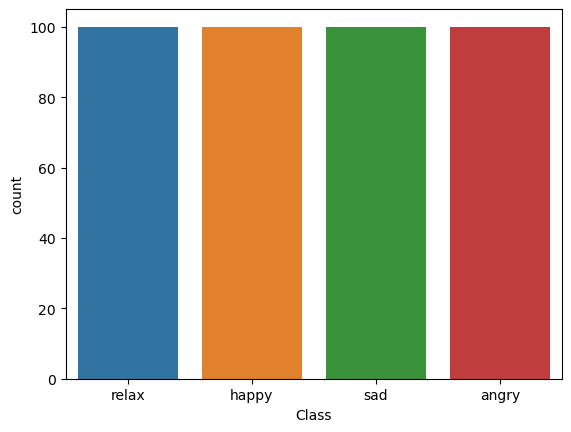

In [38]:
sns.countplot(x='Class', data = data)

In [39]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data['Class'])
data

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [40]:
missing_values = data.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Series([], dtype: int64)


In [41]:
data.corr()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Class,1.000000,-0.295092,0.179905,0.242943,-0.050760,0.355162,0.045559,-0.117374,-0.067627,-0.044363,...,0.057209,-0.112650,-0.029740,0.060236,0.330568,0.658436,0.015550,-0.217051,-0.559444,-0.076058
_RMSenergy_Mean,-0.295092,1.000000,-0.281123,-0.170943,0.001018,-0.196514,-0.004046,0.058838,0.021011,-0.057344,...,0.116780,0.121314,0.134801,0.019755,-0.034969,-0.361005,-0.093959,0.138085,0.344589,0.017421
_Lowenergy_Mean,0.179905,-0.281123,1.000000,0.051927,-0.041363,0.123084,0.128287,-0.064834,0.051065,0.017015,...,0.065676,-0.028428,0.091553,-0.030245,0.036964,0.212803,0.219543,-0.105146,-0.204983,-0.057252
_Fluctuation_Mean,0.242943,-0.170943,0.051927,1.000000,-0.119922,0.077035,0.066078,-0.105724,0.052109,-0.049287,...,-0.063941,-0.130612,0.006006,-0.024852,0.228741,0.314950,0.079096,-0.044857,-0.237601,-0.024144
_Tempo_Mean,-0.050760,0.001018,-0.041363,-0.119922,1.000000,-0.065000,0.092282,0.018257,0.037973,0.072675,...,0.042742,0.059773,0.021740,0.014066,-0.085568,-0.130662,-0.057506,0.016276,0.047717,0.103934
_MFCC_Mean_1,0.355162,-0.196514,0.123084,0.077035,-0.065000,1.000000,0.020601,0.062331,0.035704,-0.095148,...,-0.140808,-0.096281,-0.124380,-0.030001,-0.021792,0.415425,0.028937,-0.130964,-0.462958,-0.101777
_MFCC_Mean_2,0.045559,-0.004046,0.128287,0.066078,0.092282,0.020601,1.000000,0.030869,0.381396,0.182625,...,0.020501,0.011785,-0.099968,-0.027340,-0.053658,0.112911,0.148877,-0.040235,-0.145812,0.026345
_MFCC_Mean_3,-0.117374,0.058838,-0.064834,-0.105724,0.018257,0.062331,0.030869,1.000000,0.185289,0.104706,...,-0.089810,0.008456,-0.054242,0.010879,-0.165410,-0.074145,0.081755,-0.041077,-0.016337,-0.077185
_MFCC_Mean_4,-0.067627,0.021011,0.051065,0.052109,0.037973,0.035704,0.381396,0.185289,1.000000,0.274641,...,-0.037368,0.059997,-0.082904,-0.029550,-0.082057,-0.021947,0.123147,-0.061776,0.014821,-0.111811
_MFCC_Mean_5,-0.044363,-0.057344,0.017015,-0.049287,0.072675,-0.095148,0.182625,0.104706,0.274641,1.000000,...,0.045591,0.004970,0.027684,0.028802,-0.082998,-0.105274,0.037048,0.028897,0.049388,0.000519


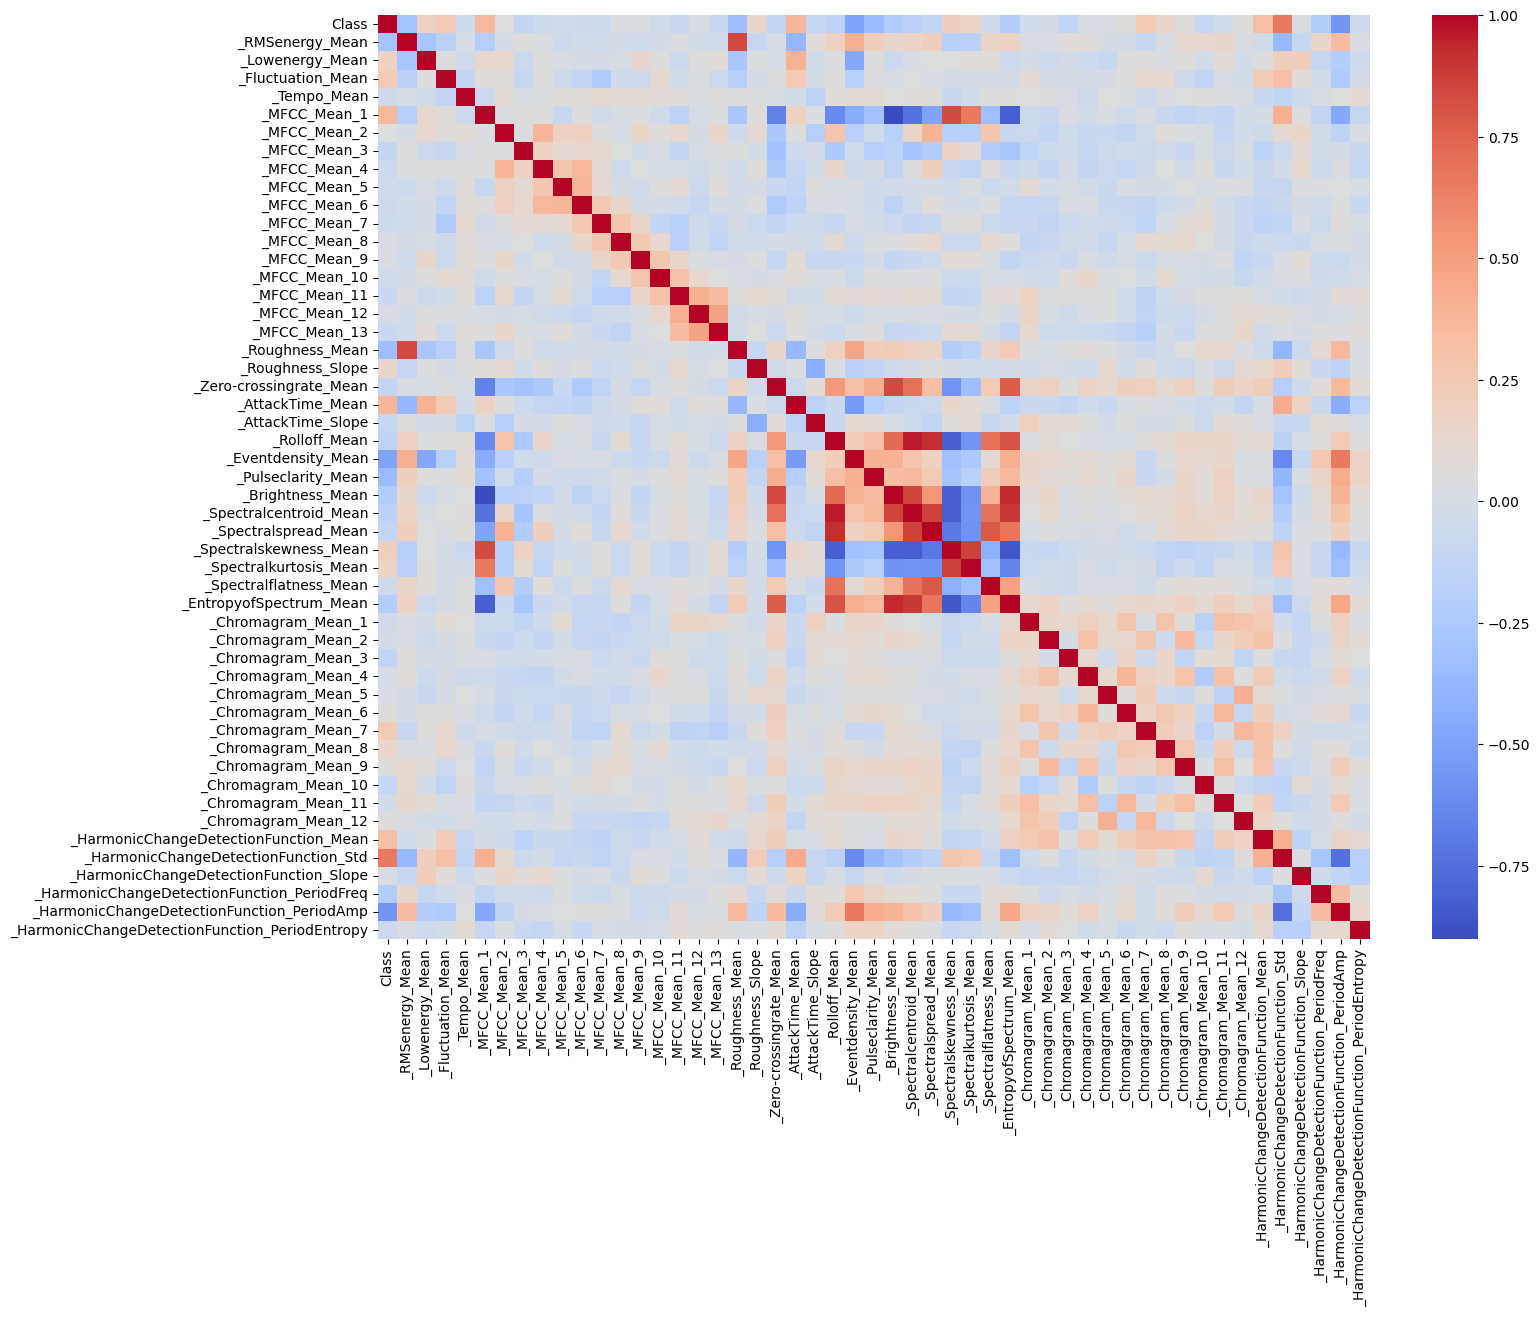

In [42]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [43]:
X = data.loc[:,data.columns != "Class"]
Y = data.loc[:,data.columns == "Class"]
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,0.104,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,0.039,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,0.214,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,0.062,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [45]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

# KNN Classification

In [46]:
model = KNeighborsClassifier()
model.fit(x_train, Y_train.values.ravel())

KNeighborsClassifier()

In [47]:
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.6166666666666667


# Dimensionality Reduction

In [48]:
pca = PCA(n_components=8)
pca.fit(X)
x_pca = pca.transform(X)
transformed = pd.DataFrame(x_pca)
X=transformed
X

,0,1,2,3,4,5,6,7
0,-4315.951070,-319.244997,-106.557738,-36.325438,-10.260205,-11.153137,2.253959,2.122894
1,-4997.915969,-204.659055,232.987593,-171.026784,7.369297,-23.111667,5.839065,0.201705
2,5477.082281,-1143.668099,182.075481,231.743078,234.929999,-55.963202,3.538048,3.024245
3,1044.768120,-680.731181,403.931678,-24.269367,-210.213743,58.422819,-0.078879,2.701562
4,-2528.116799,-546.071490,38.414913,-380.282886,63.929483,31.550148,0.067180,2.641705
...,...,...,...,...,...,...,...,...
395,-517.947379,-400.779963,494.987243,-313.340557,-39.149918,-37.639465,-0.766177,-1.274024
396,5602.349944,-284.417974,828.714276,350.715212,-207.605806,-48.001702,5.290686,-1.943284
397,1591.940010,47.039470,394.864770,-120.157528,152.758716,-6.613200,0.786061,-1.972682
398,-31.273190,-373.164731,237.691339,-325.537279,79.614985,10.287269,0.284674,-2.535460


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [50]:
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [51]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, Y_train.values.ravel())

KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.525
